<a href="https://colab.research.google.com/github/tungtvt/programming-wine-dataset/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Programming course - Final Project


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
#import dataset
wine_dataset = pd.read_csv("drive/MyDrive/WineDataset.csv")

In [8]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      1290 non-null   object 
 1   Description                1286 non-null   object 
 2   Price                      1290 non-null   object 
 3   Capacity                   1290 non-null   object 
 4   Grape                      1275 non-null   object 
 5   Secondary Grape Varieties  488 non-null    object 
 6   Closure                    1279 non-null   object 
 7   Country                    1284 non-null   object 
 8   Unit                       1281 non-null   float64
 9   Characteristics            1253 non-null   object 
 10  Per bottle / case / each   1290 non-null   object 
 11  Type                       1285 non-null   object 
 12  ABV                        1281 non-null   object 
 13  Region                     1124 non-null   objec

Data Exploration

In [10]:
# Check row and column numbers

rows = wine_dataset.shape[0]
cols = wine_dataset.shape[1]
print("Rows   : " + str(rows))
print("Columns: " + str(cols))

Rows   : 1290
Columns: 17


In [11]:
wine_dataset.head(6)

,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,£9.99 per bottle,75CL,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,NaN,Rich & Juicy,NV,NaN
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. It’s...,£15.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021,Napa Valley
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,£12.49 per bottle,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022,NaN
3,Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,£17.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022,Macon
4,Bread & Butter 'Winemaker's Selection' Pinot N...,Bread & Butter is that thing that you can coun...,£15.99 per bottle,75CL,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,ABV 13.50%,California,Smooth & Mellow,2021,Napa Valley
5,Louis Roederer 'Cristal' Champagne 2015,Cristal is Louis Roederer’s flagship wine. It ...,£300.00 per bottle,75CL,Chardonnay,NaN,Natural Cork,France,9.0,NaN,per bottle,White,ABV 12.00%,NaN,NaN,2015,NaN


In [12]:
wine_dataset.tail(6)

,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
1284,"Viñalba Malbec-Bonarda 2019/20/21, Mendoza","When Hervé J Fabre came to the Uco Valley, he ...",£9.99 per bottle,75CL,Malbec,Bonarda,Natural Cork,Argentina,10.5,"Violet, Black Fruit, Floral, Red Fruit, Ripe F...",per bottle,Red,ABV 14.00%,Mendoza,Soft & Fruity,2021,NaN
1285,"Vouvray Sec 'Expresion de Silex' 2020/21, Loire",Although Denis Meunier is only in his late 20s...,£11.99 per bottle,75CL,Chenin Blanc,NaN,Natural Cork,France,9.4,"Quince, Green Apple, Lemon, Pear",per bottle,White,ABV 12.50%,Loire,Aromatic & Floral,2021,Vouvray
1286,"Waimea Estates Pinot Noir Rosé 2021, Nelson",Waimea’s vineyards are less than 1km from the ...,£13.99 per bottle,75CL,Pinot Noir,NaN,Screwcap,New Zealand,9.8,"Floral, Raspberry, Red Cherry, Strawberry",per bottle,Rosé,ABV 13.00%,Nelson,Delicate & Dry,2021,NaN
1287,Wakefield 'Visionary' Cabernet Sauvignon 2010,Made from the very best fruit nourished by 40-...,£85.00 per bottle,75CL,Cabernet Sauvignon,NaN,Screwcap,Australia,10.1,"Vanilla, Blackberry, Blackcurrant, Cedar, Euca...",per bottle,Red,ABV 13.50%,South Australia,Savoury & Full Bodied,2010,Clare Valley
1288,Yalumba 'The Menzies' Cabernet Sauvignon 2015/...,"In 1961, Sir Robert Menzies said that Yalumba'...",£37.99 per bottle,75CL,Cabernet Sauvignon,NaN,Natural Cork,Australia,10.9,"Black Plum, Blackcurrant, Vanilla",per bottle,Red,ABV 14.50%,South Australia,Savoury & Full Bodied,2016,Coonawarra
1289,"Yalumba 'Virgilius' Viognier 2017, Eden Valley",Yalumba's Virgilius is often regarded as Austr...,£34.99 per bottle,75CL,Viognier,NaN,Screwcap,Australia,10.1,"Peach, Apricot, Floral, Honeysuckle",per bottle,White,ABV 13.50%,NaN,Aromatic & Floral,2017,Eden Valley


In [13]:
wine_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit,1281.0,10.177674,2.31885,0.0,9.4,10.1,10.5,39.0


In [14]:
wine_dataset.isnull().sum()

,0
Title,0
Description,4
Price,0
Capacity,0
Grape,15
Secondary Grape Varieties,802
Closure,11
Country,6
Unit,9
Characteristics,37


In [16]:
#count unique value
wine_dataset.nunique()

,0
Title,1289
Description,1283
Price,128
Capacity,13
Grape,113
Secondary Grape Varieties,198
Closure,4
Country,25
Unit,55
Characteristics,888


In [ ]:
#make copy of dataset
copy_wine = wine.copy()

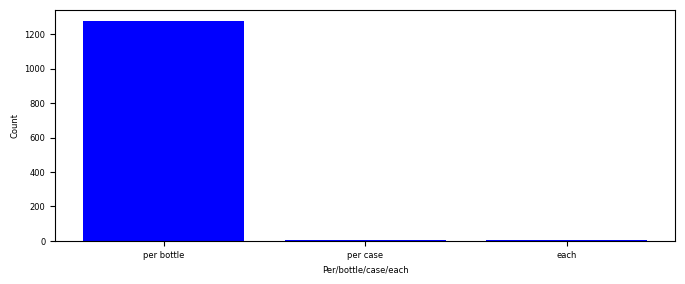

In [47]:
#per bottle/ case/ each value counts
per_bottle_case_each_counts = wine_dataset['Per bottle / case / each'].value_counts()
per_bottle_case_each_counts_df = per_bottle_case_each_counts.to_frame().T
#plotting
plt.figure(figsize=(8,3))
plt.bar(per_bottle_case_each_counts.index, per_bottle_case_each_counts.values, color='blue')
plt.xlabel('Per/bottle/case/each', fontsize = 6)
plt.ylabel('Count', fontsize = 6)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.show()

In [18]:
wine_dataset['Type'].value_counts()

,count
Type,
White,584
Red,569
Rosé,124
Tawny,4
Orange,2
Brown,1
Mixed,1


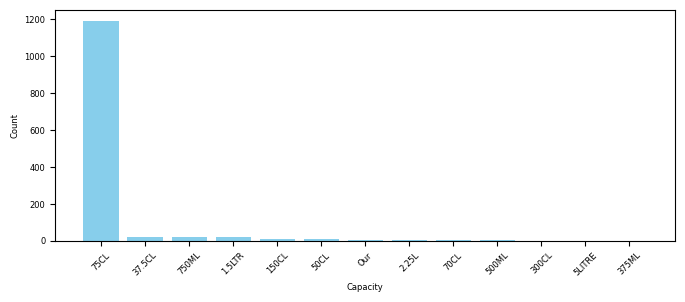

In [45]:
#capacity value counts
capacity_counts =wine_dataset['Capacity'].value_counts()
capacity_counts_df = capacity_counts.to_frame().T
#plotting
plt.figure(figsize=(8,3))
plt.bar(capacity_counts.index, capacity_counts.values, color='skyblue')
plt.xlabel('Capacity', fontsize = 6)
plt.ylabel('Count', fontsize = 6)
plt.xticks(rotation=45, fontsize = 6)
plt.yticks(fontsize = 6)
plt.show()

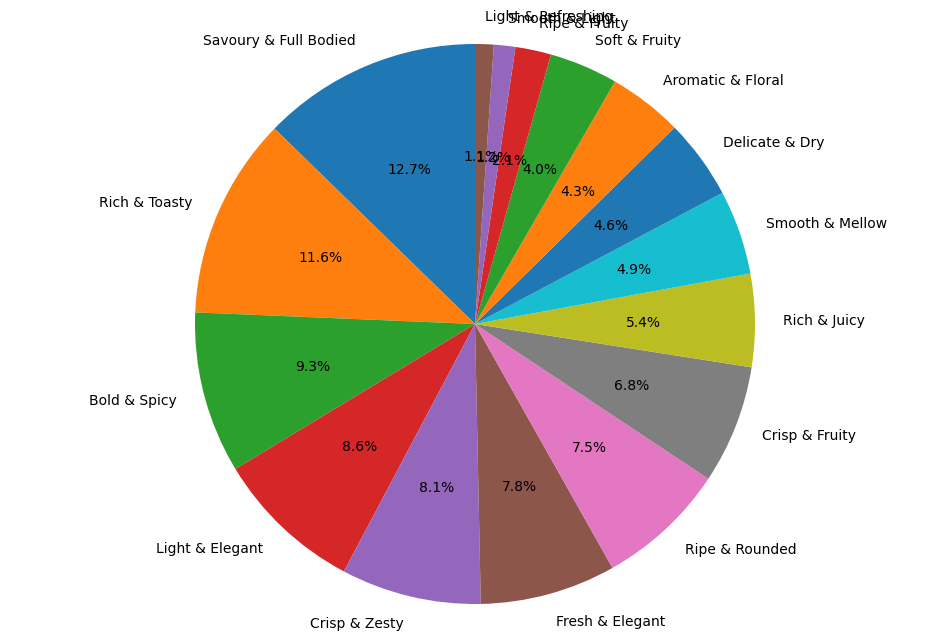

In [46]:
#style value counts
style_counts = wine_dataset['Style'].value_counts()
style_counts_df = style_counts.to_frame().T
#plot a chart
plt.figure(figsize=(12, 8))
plt.pie(style_counts, labels=style_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

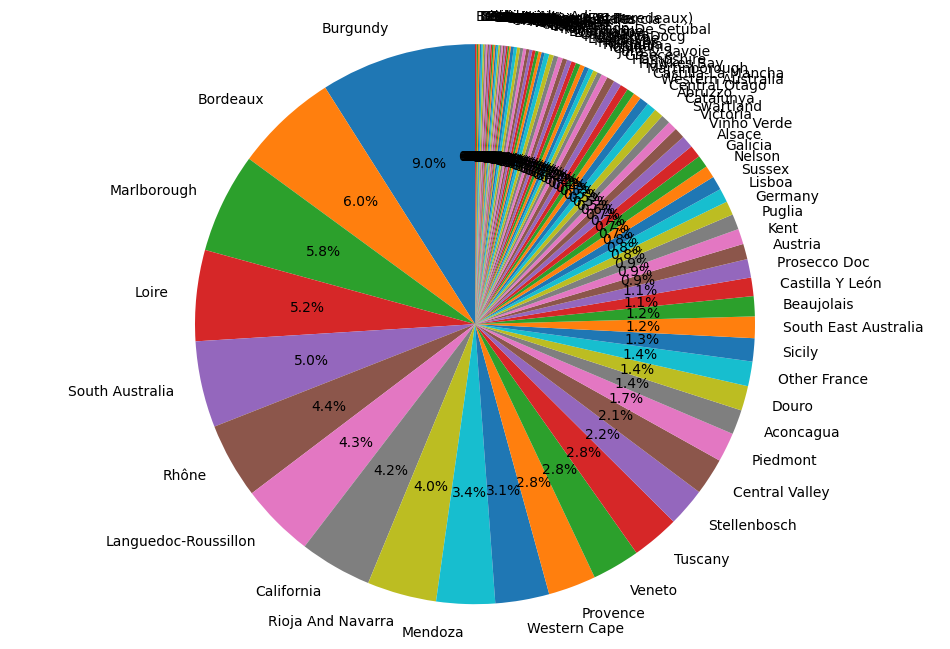

In [48]:
#region value counts
region_counts = wine_dataset['Region'].value_counts()
region_counts_df = region_counts.to_frame().T
#plot a chart
plt.figure(figsize=(12, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

Data Cleaning

In [27]:
wine_dataset_clean = wine_dataset.copy()

In [29]:
wine_dataset_clean.dropna(inplace=True)

In [30]:
wine_dataset_clean.drop_duplicates(inplace=True)

In [31]:
wine_dataset_clean.drop(columns=['Title'], inplace=True)
wine_dataset_clean.drop(columns=['Description'], inplace=True)
wine_dataset_clean.drop(columns=['Per bottle / case / each'], inplace=True)
wine_dataset_clean.drop(columns=['Secondary Grape Varieties'], inplace=True)

In [32]:
wine_dataset_clean = wine_dataset_clean[wine_dataset_clean['Vintage'] != 'NV']
wine_dataset_clean = wine_dataset_clean[wine_dataset_clean['Vintage'].str.match(r'^20\d{2}$')]

In [33]:
#creat a function to extract number from the cell
def clean_column(dataset, column):
    #remove non-numeric characters, then convert to float
    dataset[column] = pd.to_numeric(dataset[column].str.extract('(\d+\.\d+)')[0], errors='coerce')
    return dataset


In [34]:
#extract number from Price and ABV column
wine_dataset_clean = clean_column(wine_dataset_clean, 'Price')
wine_dataset_clean = clean_column(wine_dataset_clean, 'ABV')

In [36]:
clean_rows = wine_dataset_clean.shape[0]
clean_cols = wine_dataset_clean.shape[1]
print("Rows   : " + str(rows))
print("Columns: " + str(cols))

Rows   : 1290
Columns: 17


In [37]:
wine_dataset_clean.head(6)

,Price,Capacity,Grape,Closure,Country,Unit,Characteristics,Type,ABV,Region,Style,Vintage,Appellation
13,22.99,75CL,Cinsault,Natural Cork,France,9.8,"Strawberry, Herbaceous, Peach, Raspberry",Rosé,13.0,Provence,Delicate & Dry,2022,Côtes De Provence
15,15.99,75CL,Cinsault,Natural Cork,France,9.8,"Strawberry, Herbaceous, Peach, Raspberry",Rosé,13.0,Provence,Delicate & Dry,2022,Côtes De Provence
18,23.99,75CL,Grenache,Natural Cork,France,10.1,"Strawberry, Herbaceous, Peach, Raspberry",Rosé,13.5,Provence,Delicate & Dry,2022,Côtes De Provence
27,17.99,75CL,Grenache,Natural Cork,France,9.8,"Strawberry, Herbaceous, Peach, Raspberry",Rosé,13.0,Provence,Delicate & Dry,2022,Côtes De Provence
28,13.99,75CL,Grenache,Screwcap,France,9.8,"Strawberry, Peach, Raspberry",Rosé,13.0,Provence,Delicate & Dry,2022,Coteaux Varois-En-Provence
29,17.99,75CL,Tempranillo,Natural Cork,Spain,10.9,"Vanilla, Black Fruit, Red Fruit",Red,14.5,Rioja And Navarra,Savoury & Full Bodied,2019,Rioja


In [42]:
wine_dataset_clean.ABV.max()

16.0

In [41]:
wine_dataset_clean.ABV.min()

10.5

In [44]:
wine_dataset_clean.Price.max()

270.0

In [43]:
wine_dataset_clean.Price.min()

6.99

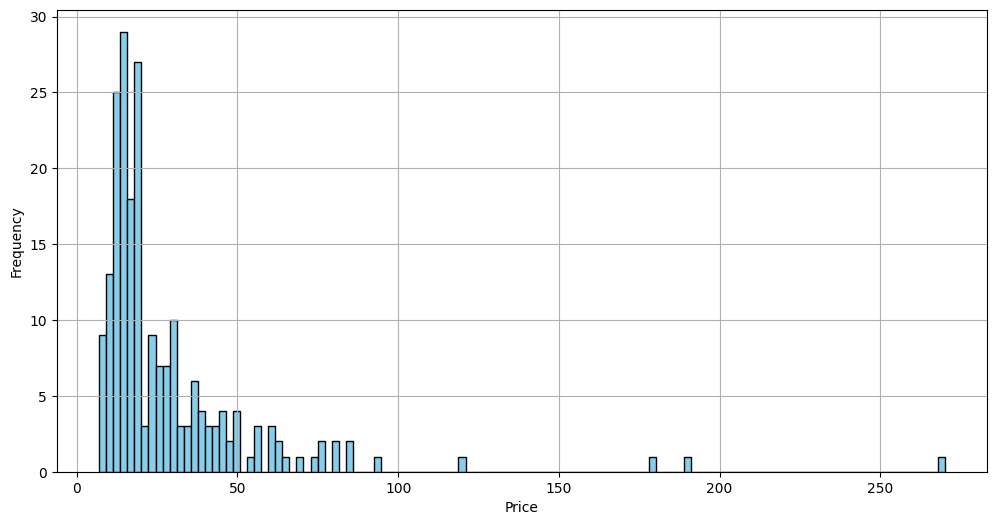

In [51]:
#show the histogram of the price of the bottle
plt.subplots(figsize=(12, 6))
plt.hist(wine_dataset_clean['Price'], bins=120, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [52]:
grape_counts = df['Grape'].value_counts()
print(grape_counts)

Grape
Grenache              57
Cabernet Sauvignon    43
Tempranillo           27
Merlot                23
Corvina               10
Syrah                  5
Cinsault               4
Sauvignon Blanc        4
Carignan               3
Grenache Blanc         3
Cabernet Franc         3
Shiraz                 3
Garganega              2
Gamay                  2
Sangiovese             2
Viura                  2
Chardonnay             2
Carménère              2
Mourvèdre              2
Marsanne               2
Rondinella             1
Turbiana               1
Nerello Mascalese      1
Zinfandel              1
Garnacha               1
Malbec                 1
Chenin Blanc           1
Viognier               1
Roussanne              1
Tibouren               1
Grolleau               1
Name: count, dtype: int64


In [38]:
df = pd.DataFrame(wine_dataset_clean)

In [53]:
df

,Price,Capacity,Grape,Closure,Country,Unit,Characteristics,Type,ABV,Region,Style,Vintage,Appellation
13,22.99,75CL,Cinsault,Natural Cork,France,9.8,"Strawberry, Herbaceous, Peach, Raspberry",Rosé,13.0,Provence,Delicate & Dry,2022,Côtes De Provence
15,15.99,75CL,Cinsault,Natural Cork,France,9.8,"Strawberry, Herbaceous, Peach, Raspberry",Rosé,13.0,Provence,Delicate & Dry,2022,Côtes De Provence
18,23.99,75CL,Grenache,Natural Cork,France,10.1,"Strawberry, Herbaceous, Peach, Raspberry",Rosé,13.5,Provence,Delicate & Dry,2022,Côtes De Provence
27,17.99,75CL,Grenache,Natural Cork,France,9.8,"Strawberry, Herbaceous, Peach, Raspberry",Rosé,13.0,Provence,Delicate & Dry,2022,Côtes De Provence
28,13.99,75CL,Grenache,Screwcap,France,9.8,"Strawberry, Peach, Raspberry",Rosé,13.0,Provence,Delicate & Dry,2022,Coteaux Varois-En-Provence
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,14.99,75CL,Marsanne,Screwcap,Australia,10.1,"Tropical Fruit, Apricot, Butter, Honey, Melon,...",White,13.5,Victoria,Ripe & Rounded,2018,Rutherglen
1233,270.00,75CL,Cabernet Sauvignon,Natural Cork,Italy,10.5,"Spice, Black Fruit, Herbaceous",Red,14.0,Tuscany,Savoury & Full Bodied,2019,Bolgheri
1242,29.99,75CL,Cabernet Sauvignon,Natural Cork,USA,11.3,"Vanilla, Black Fruit, Black Plum, Blackberry, ...",Red,15.0,California,Smooth & Mellow,2019,Napa Valley
1264,120.00,75CL,Shiraz,Natural Cork,Australia,11.3,"Violet, Black Cherry, Black Plum, Blackberry, ...",Red,15.0,South Australia,Bold & Spicy,2012,Barossa Valley


Visualization

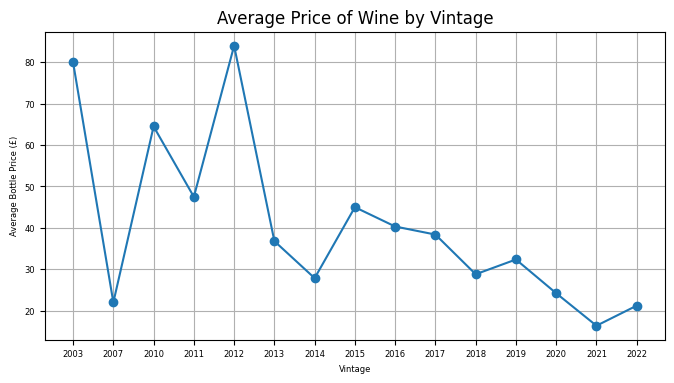

In [54]:
avg_price_by_Vintage = df.groupby('Vintage')['Price'].mean()
plt.subplots(figsize=(8, 4))
plt.plot(avg_price_by_Vintage.index, avg_price_by_Vintage.values, marker='o', linestyle='-')
plt.title('Average Price of Wine by Vintage')
plt.xlabel('Vintage', fontsize=6)
plt.ylabel('Average Bottle Price (£)', fontsize=6)
plt.tick_params(axis='both', which='major', labelsize=6)
plt.grid(True)
plt.show()

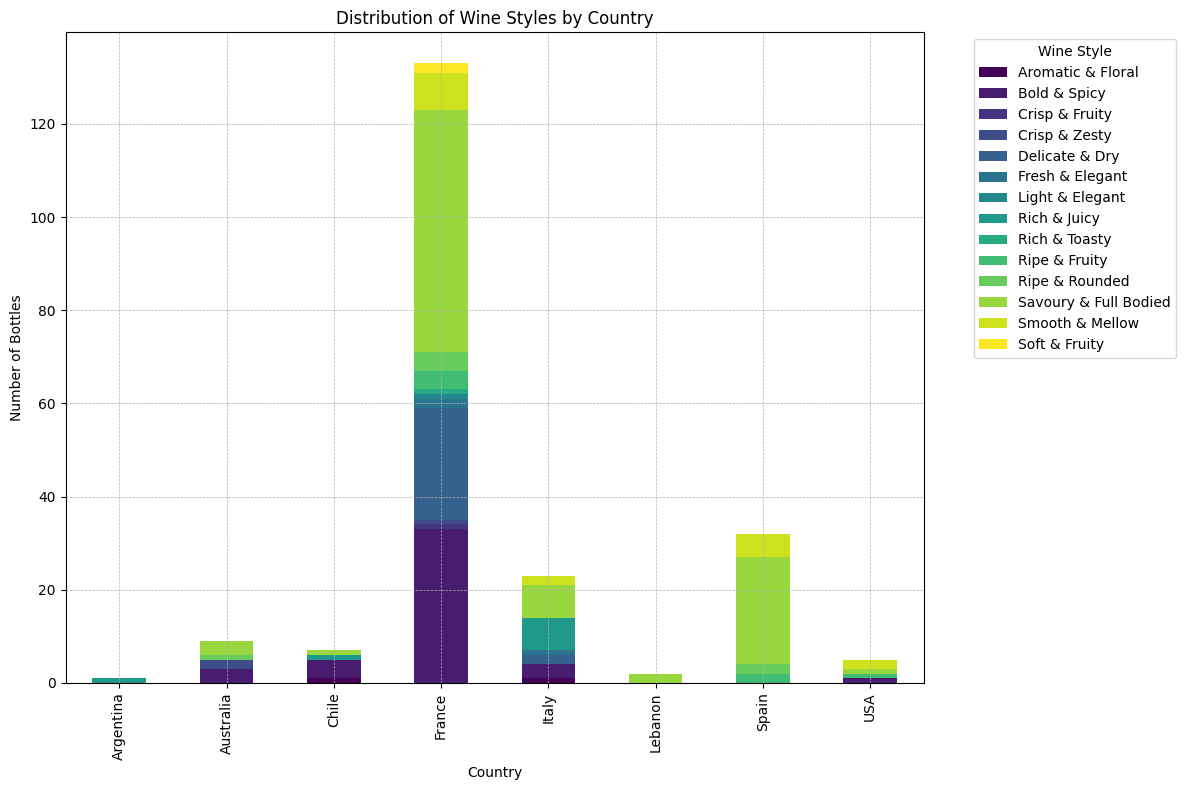

In [65]:
country_style_counts = wine_dataset_clean.groupby(['Country', 'Style']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(12, 8))
country_style_counts.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
plt.title('Distribution of Wine Styles by Country')
plt.xlabel('Country')
plt.ylabel('Number of Bottles')
plt.xticks(range(len(country_style_counts.index)))
plt.legend(title='Wine Style', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

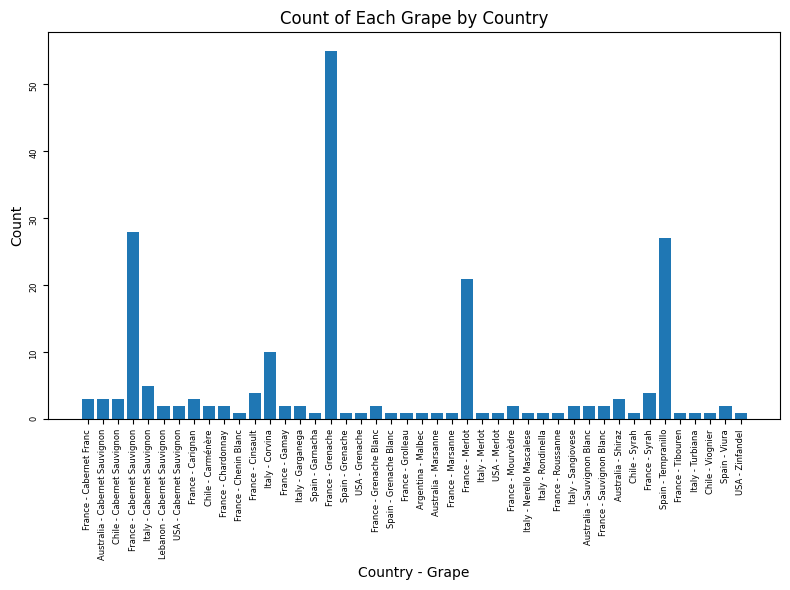

In [66]:
grape_by_country = df.groupby(['Grape', 'Country']).size().reset_index(name='number_of_bottle')
plt.figure(figsize=(8, 6))
plt.bar(grape_by_country['Country'] + ' - ' + grape_by_country['Grape'], grape_by_country['number_of_bottle'])
plt.xticks(rotation=90)
plt.xlabel('Country - Grape')
plt.ylabel('Count')
plt.title('Count of Each Grape by Country')
plt.tick_params(axis='both', which='major', rotation=90, labelsize=6)
plt.tight_layout()
plt.show()

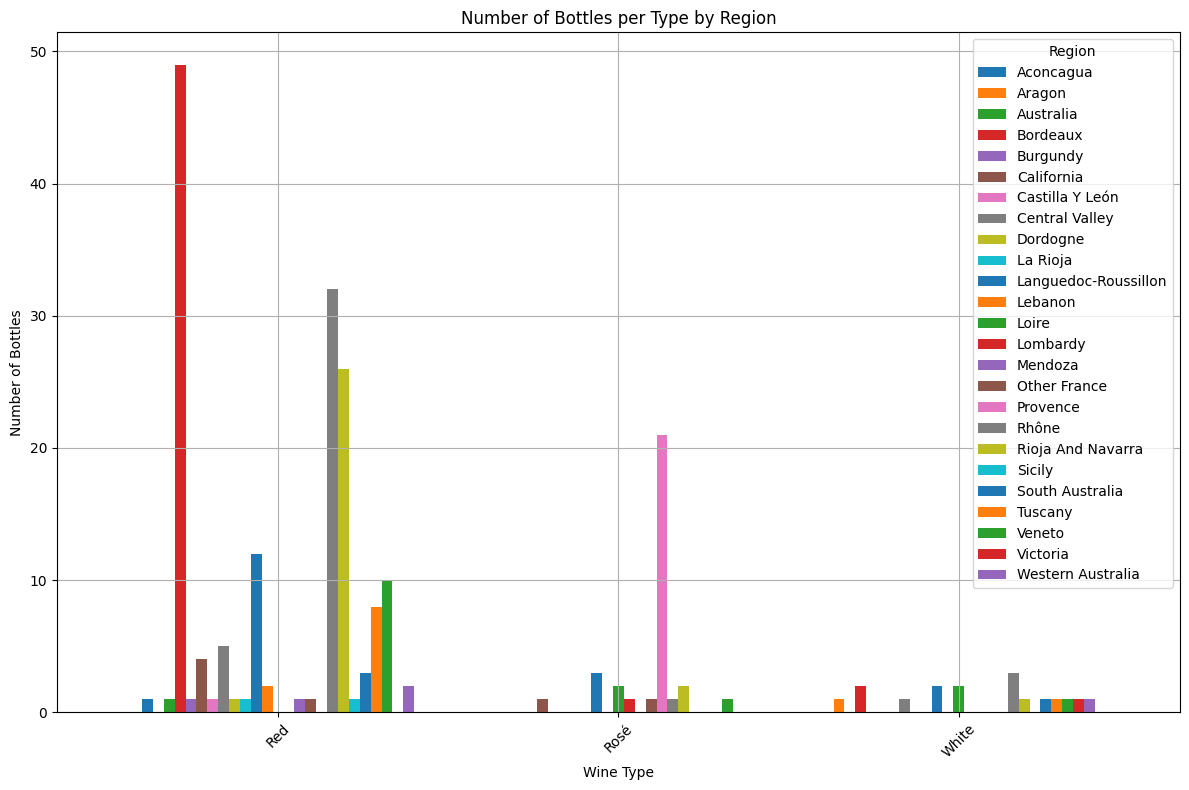

In [67]:
bottles_per_type = wine_dataset_clean.groupby(['Type', 'Region']).size().reset_index(name='Count')
# Pivot the data to get 'Type' as columns, 'Region' as rows, and 'Count' as values
pivot_table = bottles_per_type.pivot(index='Type', columns='Region', values='Count').fillna(0)
fig, ax = plt.subplots(figsize=(12, 8))
pivot_table.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Number of Bottles per Type by Region')
ax.set_xlabel('Wine Type')
ax.set_ylabel('Number of Bottles')
ax.set_xticks(range(len(pivot_table.index)))
ax.set_xticklabels(pivot_table.index, rotation=45)
ax.legend(title='Region')
ax.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-68-c2e5f80b5583>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Price', data=wine_dataset_clean, palette="Set3", ax=ax)


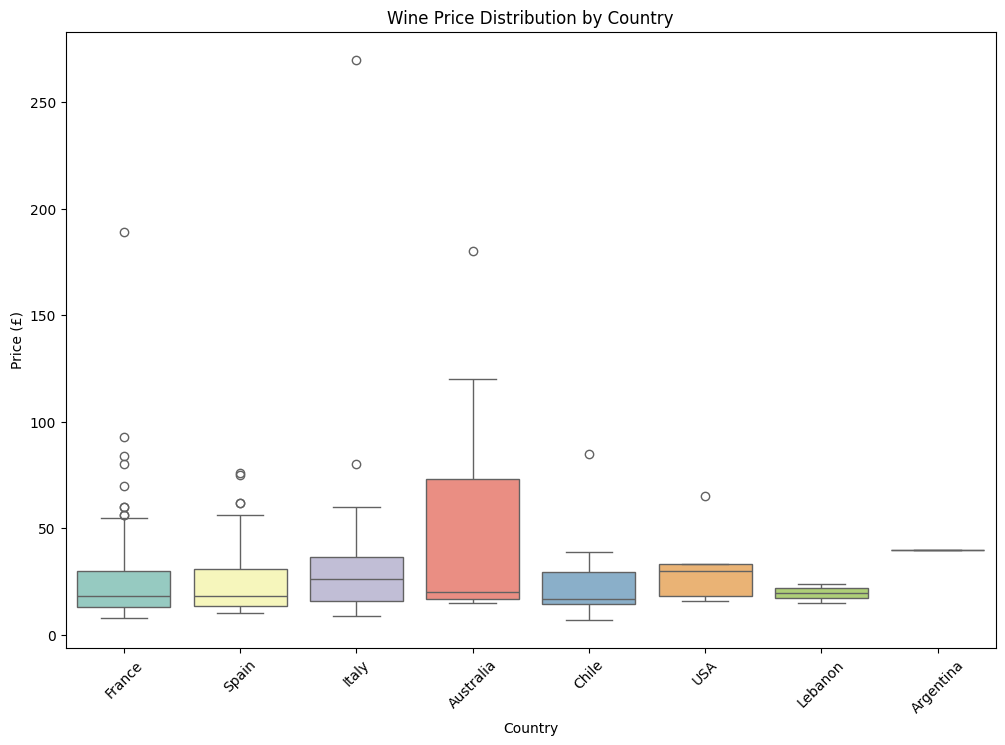

In [68]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='Country', y='Price', data=wine_dataset_clean, palette="Set3", ax=ax)
ax.set_title('Wine Price Distribution by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Price (£)')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

<ipython-input-69-6af2c6f56e40>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_country, y=avg_price_per_country.index, palette="viridis", ax=ax)


Text(0, 0.5, 'Country')

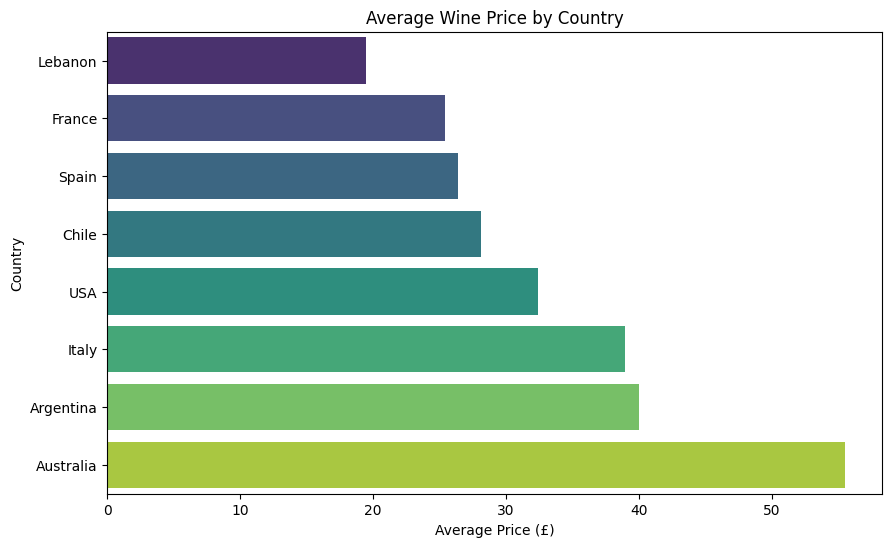

In [69]:
avg_price_per_country = df.groupby('Country')['Price'].mean().sort_values()
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=avg_price_per_country, y=avg_price_per_country.index, palette="viridis", ax=ax)
ax.set_title('Average Wine Price by Country')
ax.set_xlabel('Average Price (£)')
ax.set_ylabel('Country')

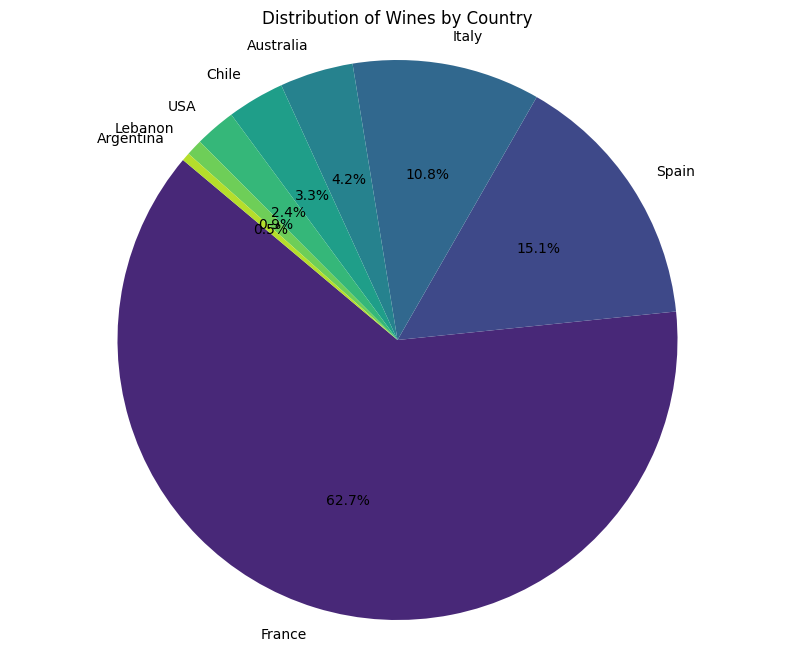

In [70]:
#Distribution of Wines by Country
country_distribution = df['Country'].value_counts()
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(country_distribution, labels=country_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(country_distribution)))
ax.set_title('Distribution of Wines by Country')
ax.axis('equal')
plt.show()

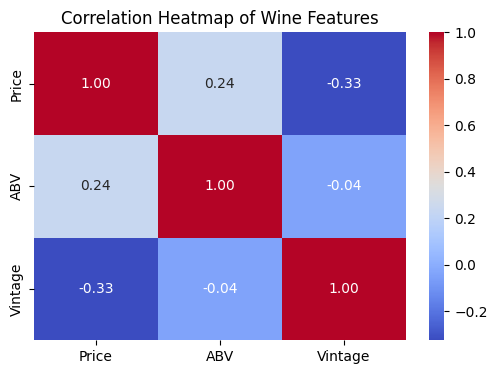

In [72]:
correlation_matrix = df[['Price', 'ABV', 'Vintage']].corr()
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=ax, )
ax.set_title('Correlation Heatmap of Wine Features')
plt.show()

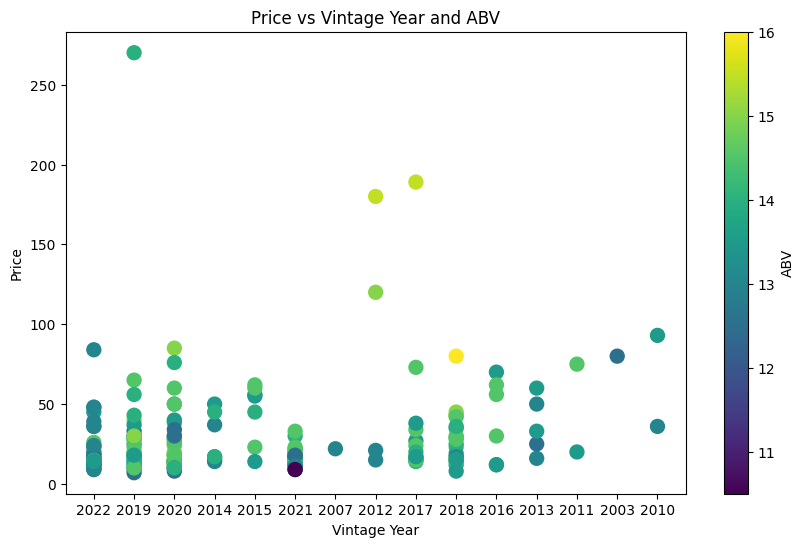

In [74]:
#Average Price vs Vintage Year and ABV
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(df['Vintage'], df['Price'], c=df['ABV'], cmap='viridis', s=100)
ax.set_xlabel('Vintage Year')
ax.set_ylabel('Price')
ax.set_title('Price vs Vintage Year and ABV')
fig.colorbar(scatter, label='ABV')
plt.show()

In [75]:
#modeling

In [77]:
X = df[['Vintage', 'ABV']]
y = df['Price']
#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [78]:
#fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
#predict and pvaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

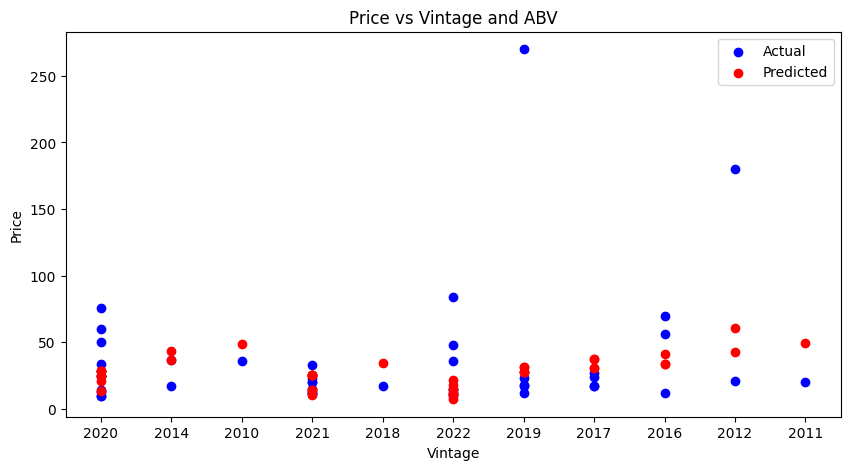

In [80]:
#visualization
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X_test['Vintage'], y_test, color='blue', label='Actual')
ax.scatter(X_test['Vintage'], y_pred, color='red', label='Predicted')
ax.set_title('Price vs Vintage and ABV')
ax.set_xlabel('Vintage')
ax.set_ylabel('Price')
ax.legend()
plt.show()

In [83]:
#show the predict result
comparison_df = pd.DataFrame({'Vintage': X_test['Vintage'], 'Actual Price': y_test, 'Predicted Price': y_pred})

In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.4 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st

x = st.slider('Select a value')
st.write(x, 'squared is', x * x)

Writing app.py


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.812s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 5.006s
your url is: https://tasty-poets-sleep.loca.lt
^C
